In [12]:
import yaml
import pickle
import os
from pathlib import Path
import numpy as np
import pandas as pd
from ast import literal_eval
from mnitimescales import Load, plots
import matplotlib.pyplot as plt

Inputs:

In [29]:
inputs_file = Path(os.path.abspath("")).joinpath("inputs.yaml")
with open(inputs_file, "r") as f:
    inputs = yaml.safe_load(f)

Files and paths:

In [4]:
base_path = Path(inputs["base_path"])
mat_file = base_path.joinpath(inputs["raw_dir"], inputs["mat_file"])
tau_path = base_path.joinpath(inputs["results_dir"], inputs["data_dir"])

Import data:

In [5]:
load = Load(mat_file)
df_info = load.get_info()
data = load.raw_data.copy()
data_W = data["Data_W"].T
data_N2 = data["Data_N2"].T
data_N3 = data["Data_N3"].T
data_R = data["Data_R"].T
sfreq = data["SamplingFrequency"][0, 0]

In [6]:
data_W.shape, data_N3.shape, data_R.shape

((1772, 13600), (1772, 13600), (1772, 13600))

## Plot voltage

Channel 0:

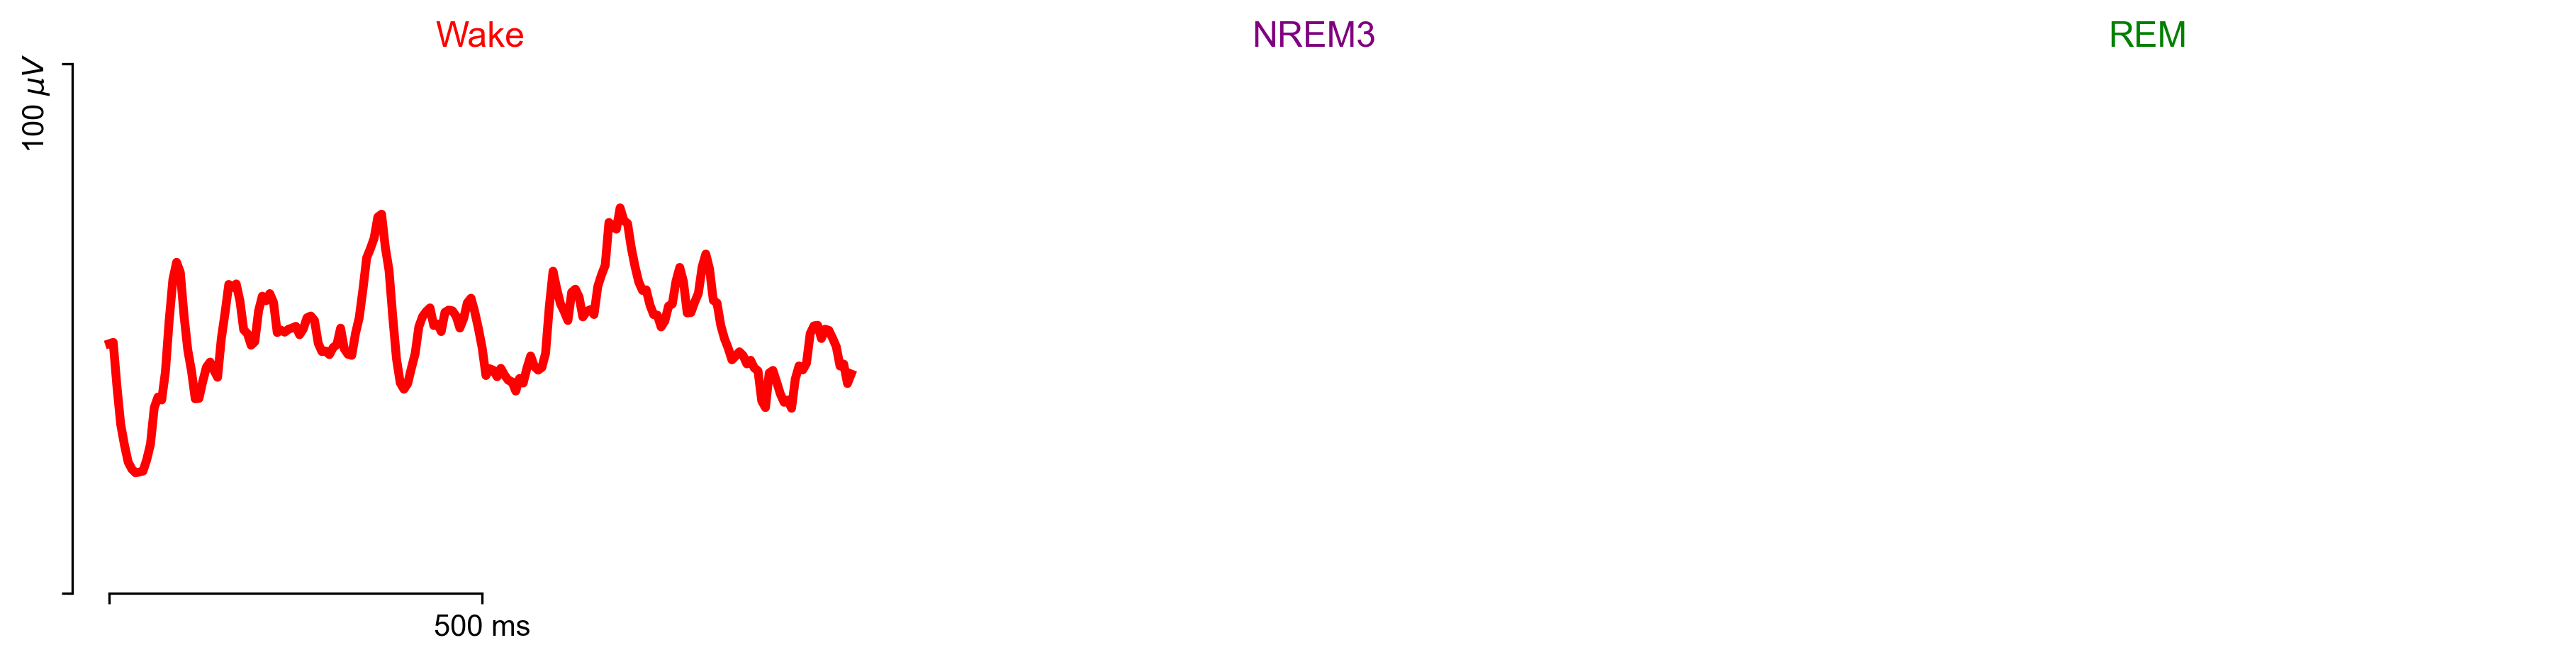

In [48]:
ch = inputs["chans"][0]
idx_ch = df_info.loc[df_info["chan"] == ch].index[0]

# Times and limits for plot
t_start = 1
t_end = t_start + 1
ylims = [-50, 50]

# Figure
fig, axs = plt.subplots(
    1,
    3,
    figsize=(12, 3),
    layout="constrained",
    dpi=300,
)

# Plot traces
idx_start = int(t_start * sfreq)
idx_end = int(t_end * sfreq)
axs[0].plot(
    data_W[idx_ch, idx_start:idx_end], lw=3, c=inputs["color_stages"]["W"], label="Wake"
)
axs[1].plot(
    data_N3[idx_ch, idx_start:idx_end],
    lw=3,
    c=inputs["color_stages"]["N3"],
    label="NREM3",
)
axs[2].plot(
    data_R[idx_ch, idx_start:idx_end], lw=3, c=inputs["color_stages"]["R"], label="REM"
)

for i in range(3):
    axs[i].set_ylim(ylims)
    if i != 0:
        plots._format_spines(axs[i], s_inv=["bottom", "left", "top", "right"])
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    else:
        plots._format_spines(
            axs[i],
            s_inv=["top", "right"],
            s_bounds={"bottom": (0, int(sfreq / 2)), "left": [-50, 50]},
        )

# Set scale bars
axs[0].set_xticks(
    [0, int(sfreq / 2)],
    labels=["", "500 ms"],
    fontsize=plots.fsize.TICK_SIZE,
)
axs[0].set_yticks(
    [-50, 50],
    labels=["", r"100 $\mu V$"],
    fontsize=plots.fsize.TICK_SIZE,
    rotation=90,
)

# Adjust plot
axs[0].set_title(
    "Wake", c=inputs["color_stages"]["W"], size=plots.fsize.TITLE_SIZE, ha="center"
)
axs[1].set_title(
    "NREM3", c=inputs["color_stages"]["N3"], size=plots.fsize.TITLE_SIZE, ha="center"
)
axs[2].set_title(
    "REM", c=inputs["color_stages"]["R"], size=plots.fsize.TITLE_SIZE, ha="center"
)

plt.show()

Channel 1:

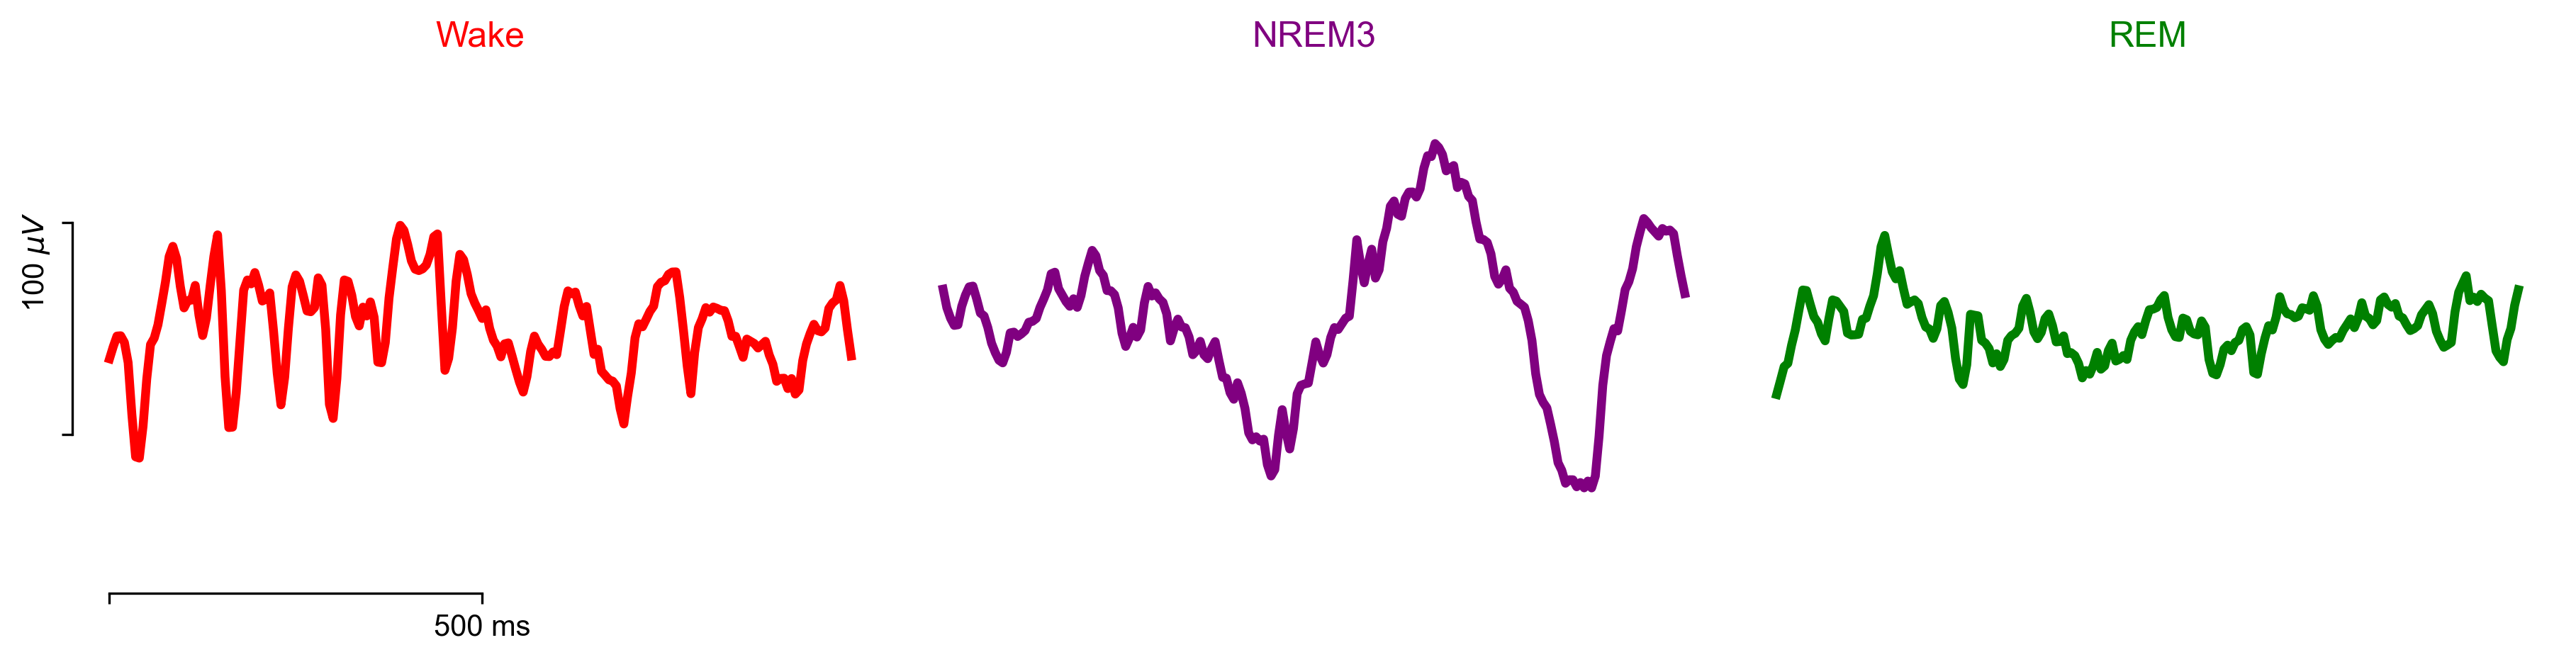

In [35]:
ch = inputs["chans"][1]
idx_ch = df_info.loc[df_info["chan"] == ch].index[0]

# Times and limits for plot
t_start = 1.5
t_end = t_start + 1
ylims = [-125, 125]

# Figure
fig, axs = plt.subplots(
    1,
    3,
    figsize=(12, 3),
    layout="constrained",
    dpi=300,
)

# Plot traces
idx_start = int(t_start * sfreq)
idx_end = int(t_end * sfreq)
axs[0].plot(
    data_W[idx_ch, idx_start:idx_end], lw=3, c=inputs["color_stages"]["W"], label="Wake"
)
axs[1].plot(
    data_N3[idx_ch, idx_start:idx_end],
    lw=3,
    c=inputs["color_stages"]["N3"],
    label="NREM3",
)
axs[2].plot(
    data_R[idx_ch, idx_start:idx_end], lw=3, c=inputs["color_stages"]["R"], label="REM"
)

for i in range(3):
    axs[i].set_ylim(ylims)
    if i != 0:
        plots._format_spines(axs[i], s_inv=["bottom", "left", "top", "right"])
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    else:
        plots._format_spines(
            axs[i],
            s_inv=["top", "right"],
            s_bounds={"bottom": (0, int(sfreq / 2)), "left": [-50, 50]},
        )

# Set scale bars
axs[0].set_xticks(
    [0, int(sfreq / 2)],
    labels=["", "500 ms"],
    fontsize=plots.fsize.TICK_SIZE,
)
axs[0].set_yticks(
    [-50, 50],
    labels=["", r"100 $\mu V$"],
    fontsize=plots.fsize.TICK_SIZE,
    rotation=90,
)

# Adjust plot
axs[0].set_title(
    "Wake", c=inputs["color_stages"]["W"], size=plots.fsize.TITLE_SIZE, ha="center"
)
axs[1].set_title(
    "NREM3", c=inputs["color_stages"]["N3"], size=plots.fsize.TITLE_SIZE, ha="center"
)
axs[2].set_title(
    "REM", c=inputs["color_stages"]["R"], size=plots.fsize.TITLE_SIZE, ha="center"
)

plt.show()

Channel 2:

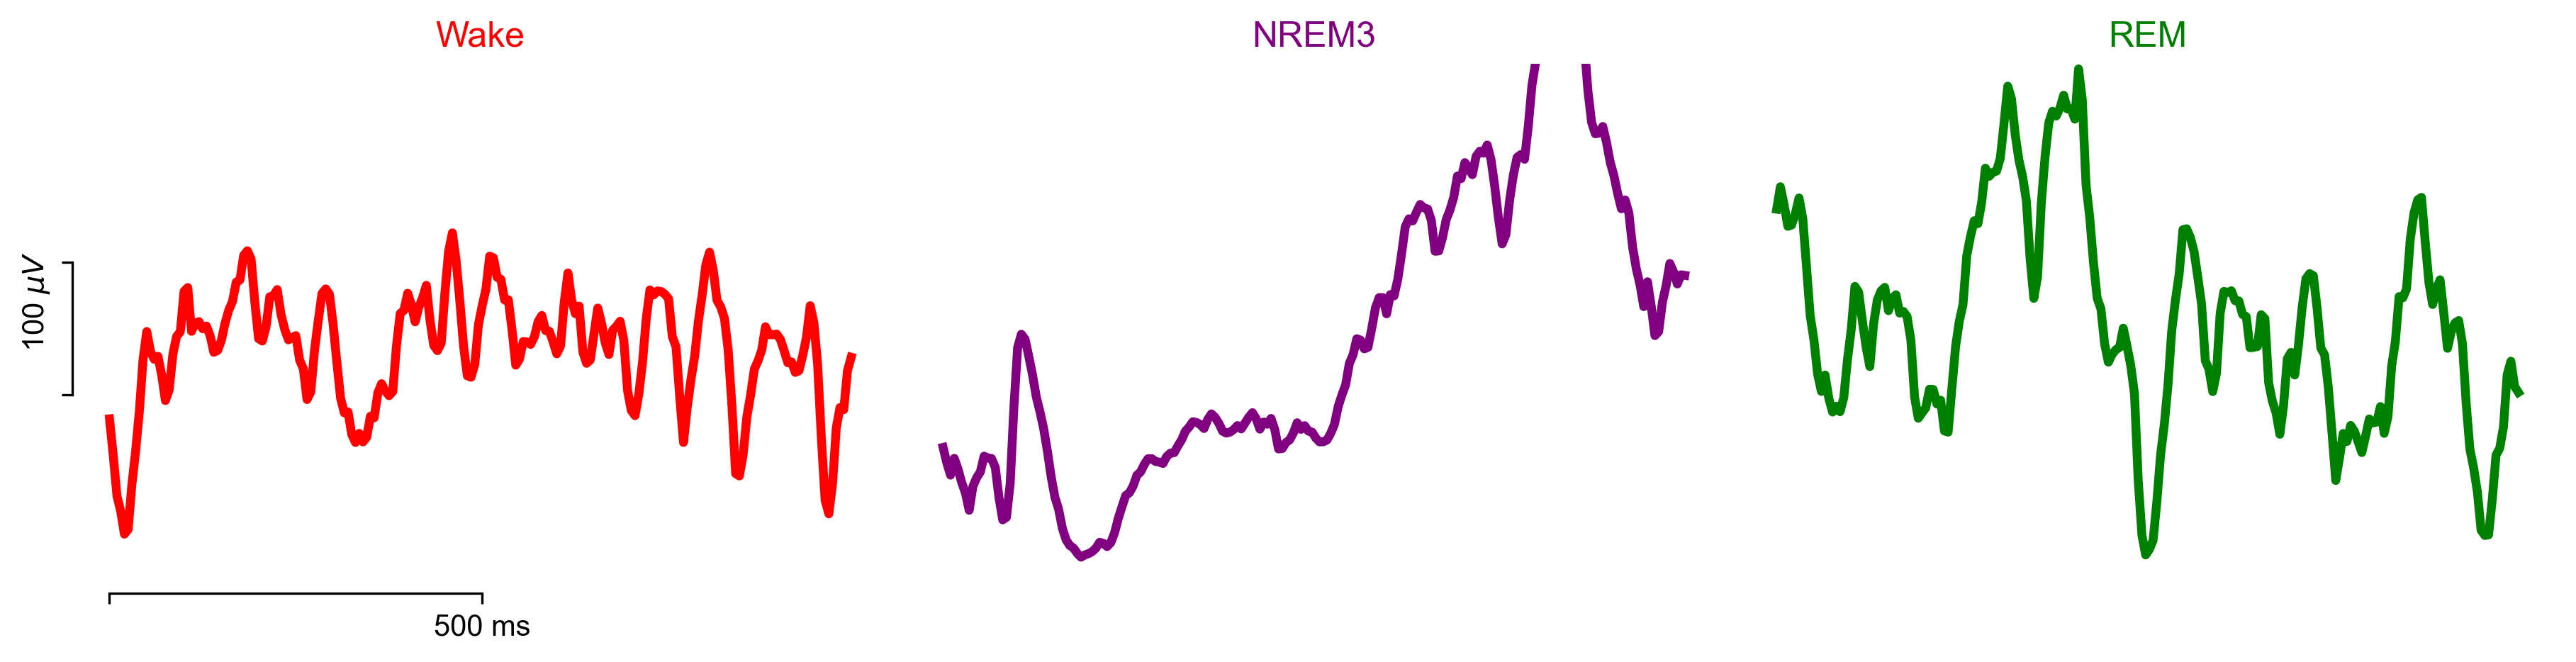

In [47]:
ch = inputs["chans"][2]
idx_ch = df_info.loc[df_info["chan"] == ch].index[0]

# Times and limits for plot
t_start = 9 # 22
t_end = t_start + 1
ylims = [-200, 200]

# Figure
fig, axs = plt.subplots(
    1,
    3,
    figsize=(12, 3),
    layout="constrained",
    dpi=300,
)

# Plot traces
idx_start = int(t_start * sfreq)
idx_end = int(t_end * sfreq)
axs[0].plot(
    data_W[idx_ch, idx_start:idx_end], lw=3, c=inputs["color_stages"]["W"], label="Wake"
)
axs[1].plot(
    data_N3[idx_ch, idx_start:idx_end],
    lw=3,
    c=inputs["color_stages"]["N3"],
    label="NREM3",
)
axs[2].plot(
    data_R[idx_ch, idx_start:idx_end], lw=3, c=inputs["color_stages"]["R"], label="REM"
)

for i in range(3):
    axs[i].set_ylim(ylims)
    if i != 0:
        plots._format_spines(axs[i], s_inv=["bottom", "left", "top", "right"])
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    else:
        plots._format_spines(
            axs[i],
            s_inv=["top", "right"],
            s_bounds={"bottom": (0, int(sfreq / 2)), "left": [-50, 50]},
        )

# Set scale bars
axs[0].set_xticks(
    [0, int(sfreq / 2)],
    labels=["", "500 ms"],
    fontsize=plots.fsize.TICK_SIZE,
)
axs[0].set_yticks(
    [-50, 50],
    labels=["", r"100 $\mu V$"],
    fontsize=plots.fsize.TICK_SIZE,
    rotation=90,
)

# Adjust plot
axs[0].set_title(
    "Wake", c=inputs["color_stages"]["W"], size=plots.fsize.TITLE_SIZE, ha="center"
)
axs[1].set_title(
    "NREM3", c=inputs["color_stages"]["N3"], size=plots.fsize.TITLE_SIZE, ha="center"
)
axs[2].set_title(
    "REM", c=inputs["color_stages"]["R"], size=plots.fsize.TITLE_SIZE, ha="center"
)

plt.show()

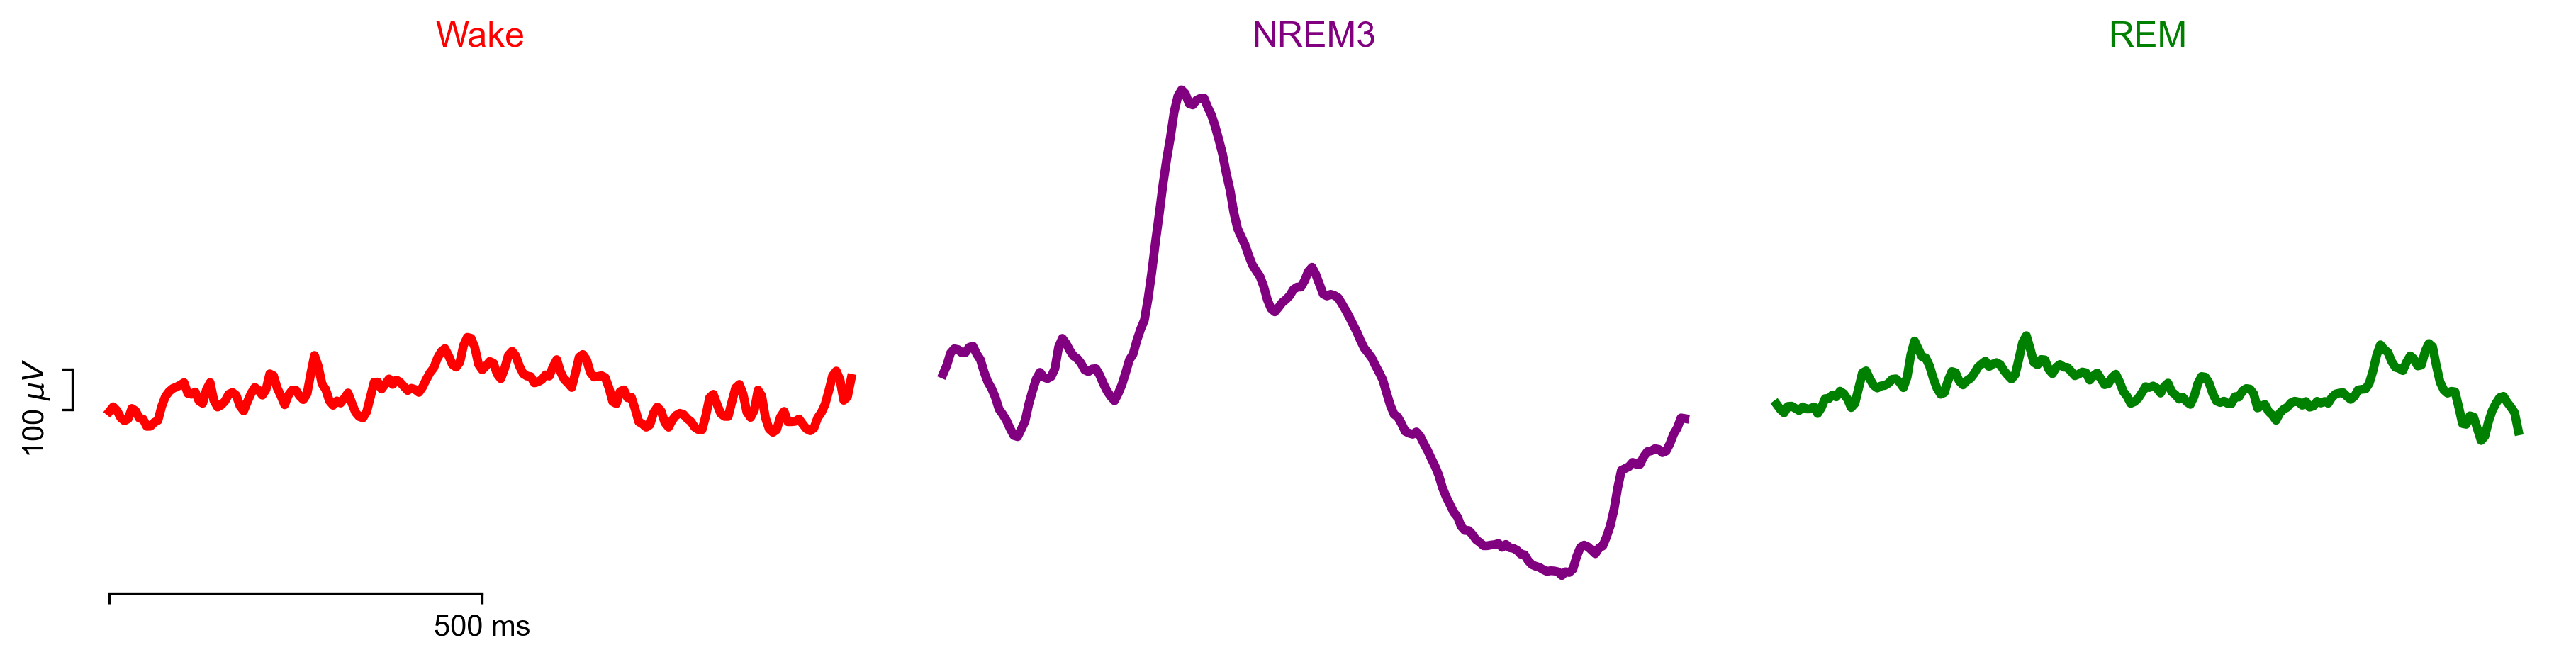

In [54]:
ch = inputs["chans"][3]
idx_ch = df_info.loc[df_info["chan"] == ch].index[0]

# Times and limits for plot
t_start = 1.5
t_end = t_start + 1
ylims = [-500, 800]

# Figure
fig, axs = plt.subplots(
    1,
    3,
    figsize=(12, 3),
    layout="constrained",
    dpi=300,
)

# Plot traces
idx_start = int(t_start * sfreq)
idx_end = int(t_end * sfreq)
axs[0].plot(
    data_W[idx_ch, idx_start:idx_end], lw=3, c=inputs["color_stages"]["W"], label="Wake"
)
axs[1].plot(
    data_N3[idx_ch, idx_start:idx_end],
    lw=3,
    c=inputs["color_stages"]["N3"],
    label="NREM3",
)
axs[2].plot(
    data_R[idx_ch, idx_start:idx_end], lw=3, c=inputs["color_stages"]["R"], label="REM"
)

for i in range(3):
    axs[i].set_ylim(ylims)
    if i != 0:
        plots._format_spines(axs[i], s_inv=["bottom", "left", "top", "right"])
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    else:
        plots._format_spines(
            axs[i],
            s_inv=["top", "right"],
            s_bounds={"bottom": (0, int(sfreq / 2)), "left": [-50, 50]},
        )

# Set scale bars
axs[0].set_xticks(
    [0, int(sfreq / 2)],
    labels=["", "500 ms"],
    fontsize=plots.fsize.TICK_SIZE,
)
axs[0].set_yticks(
    [-50, 50],
    labels=["", r"100 $\mu V$"],
    fontsize=plots.fsize.TICK_SIZE,
    rotation=90,
)

# Adjust plot
axs[0].set_title(
    "Wake", c=inputs["color_stages"]["W"], size=plots.fsize.TITLE_SIZE, ha="center"
)
axs[1].set_title(
    "NREM3", c=inputs["color_stages"]["N3"], size=plots.fsize.TITLE_SIZE, ha="center"
)
axs[2].set_title(
    "REM", c=inputs["color_stages"]["R"], size=plots.fsize.TITLE_SIZE, ha="center"
)

plt.show()

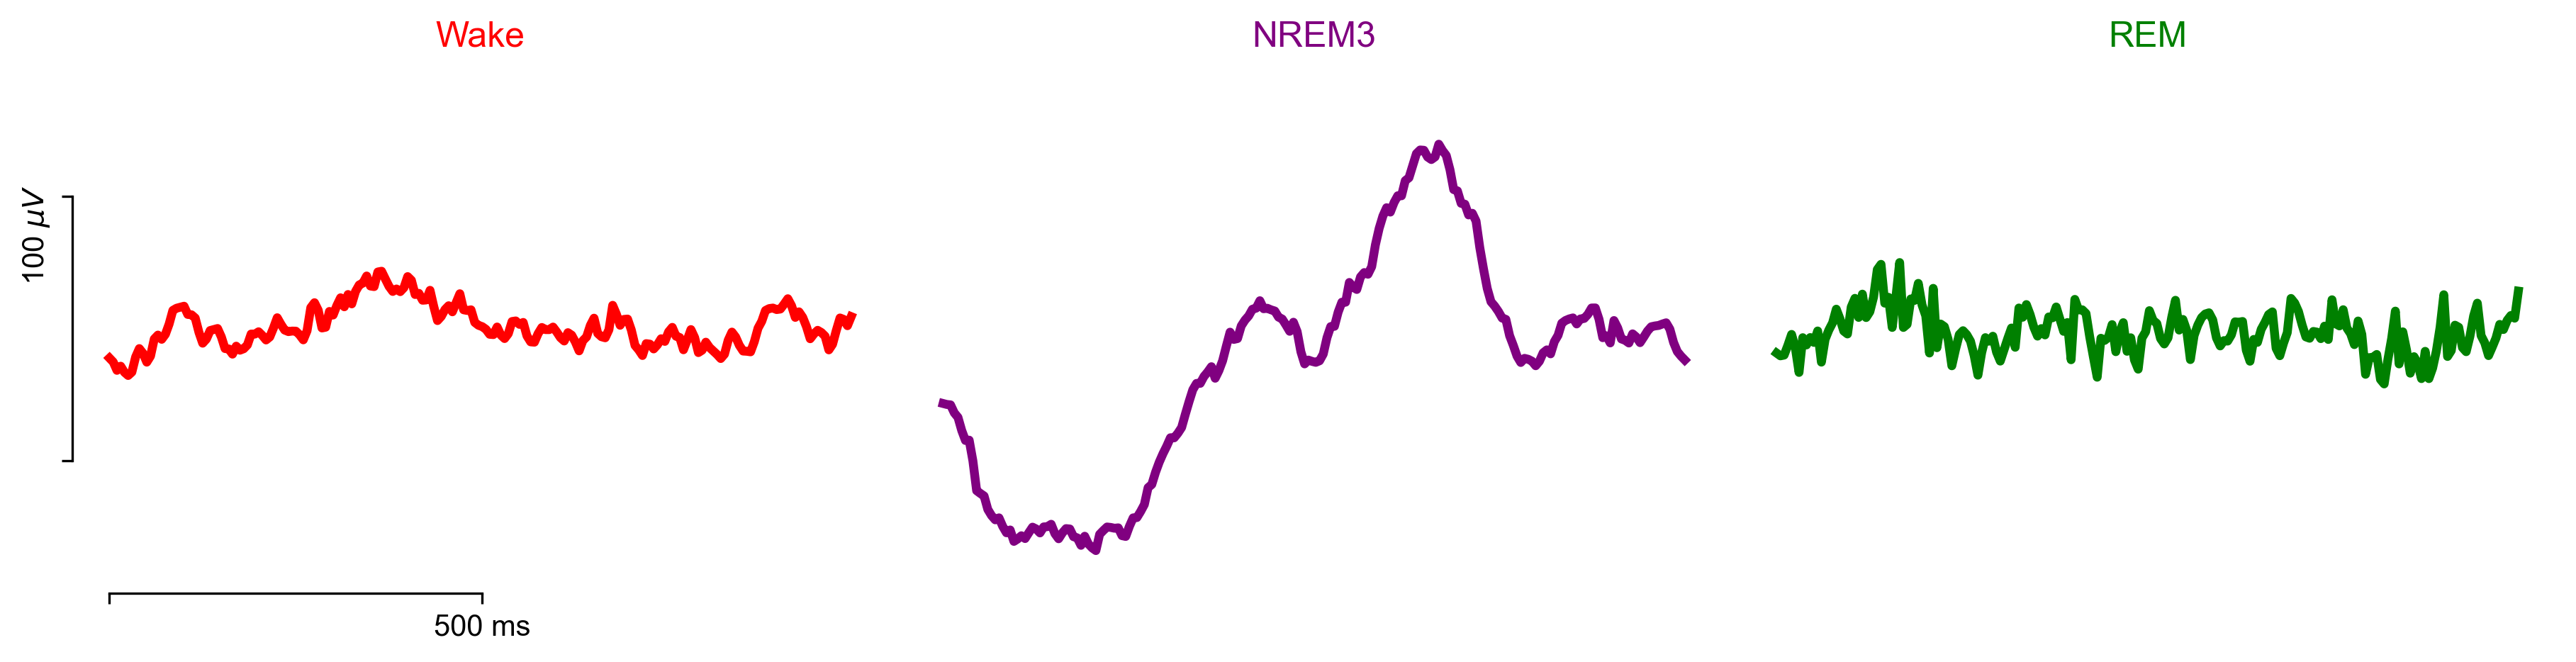

In [61]:
ch = inputs["chans"][4]
idx_ch = df_info.loc[df_info["chan"] == ch].index[0]

# Times and limits for plot
t_start = 1.5
t_end = t_start + 1
ylims = [-100, 100]

# Figure
fig, axs = plt.subplots(
    1,
    3,
    figsize=(12, 3),
    layout="constrained",
    dpi=300,
)

# Plot traces
idx_start = int(t_start * sfreq)
idx_end = int(t_end * sfreq)
axs[0].plot(
    data_W[idx_ch, idx_start:idx_end], lw=3, c=inputs["color_stages"]["W"], label="Wake"
)
axs[1].plot(
    data_N3[idx_ch, idx_start:idx_end],
    lw=3,
    c=inputs["color_stages"]["N3"],
    label="NREM3",
)
axs[2].plot(
    data_R[idx_ch, idx_start:idx_end], lw=3, c=inputs["color_stages"]["R"], label="REM"
)

for i in range(3):
    axs[i].set_ylim(ylims)
    if i != 0:
        plots._format_spines(axs[i], s_inv=["bottom", "left", "top", "right"])
        axs[i].set_xticks([])
        axs[i].set_yticks([])
    else:
        plots._format_spines(
            axs[i],
            s_inv=["top", "right"],
            s_bounds={"bottom": (0, int(sfreq / 2)), "left": [-50, 50]},
        )

# Set scale bars
axs[0].set_xticks(
    [0, int(sfreq / 2)],
    labels=["", "500 ms"],
    fontsize=plots.fsize.TICK_SIZE,
)
axs[0].set_yticks(
    [-50, 50],
    labels=["", r"100 $\mu V$"],
    fontsize=plots.fsize.TICK_SIZE,
    rotation=90,
)

# Adjust plot
axs[0].set_title(
    "Wake", c=inputs["color_stages"]["W"], size=plots.fsize.TITLE_SIZE, ha="center"
)
axs[1].set_title(
    "NREM3", c=inputs["color_stages"]["N3"], size=plots.fsize.TITLE_SIZE, ha="center"
)
axs[2].set_title(
    "REM", c=inputs["color_stages"]["R"], size=plots.fsize.TITLE_SIZE, ha="center"
)

plt.show()

## Plot ACFs

Channel 0:

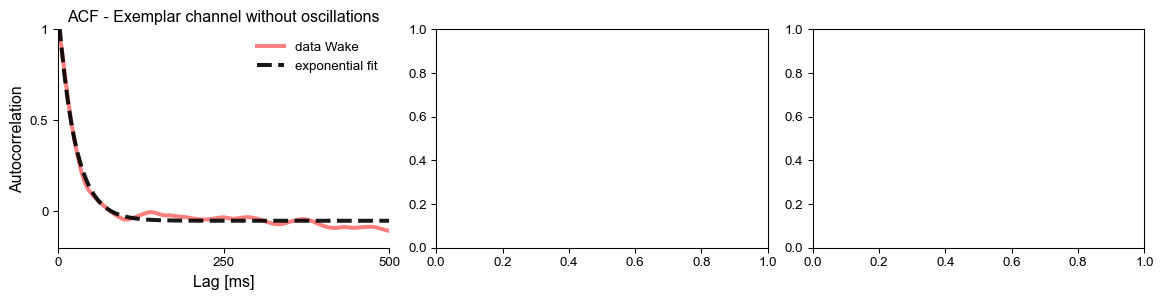

In [8]:
ch = inputs["chans"][0]
pat = inputs["pats"][0]

pat_dir = tau_path.joinpath("Pats", str(pat).zfill(3))
fig, axs = plt.subplots(1, 3, figsize=(12, 3), dpi=96, layout="constrained")

for i, stage in enumerate(["W", "N3", "R"]):
    # Load ACF
    file_name = str(pat).zfill(3) + "_" + stage.lower() + ".pkl"
    try:
        with open(pat_dir.joinpath(inputs["acf_dir"], file_name), "rb") as f:
            acf_pat_stage = pickle.load(f)
    except FileNotFoundError:
        continue
    idx_chan = acf_pat_stage["chans"].index(ch)

    # Load fit
    file_name = str(pat).zfill(3) + "_" + stage + "_tau.csv"
    df_fit = pd.read_csv(
        pat_dir.joinpath(inputs["acf_dir"], file_name),
        index_col=0,
    )
    params = literal_eval(
        df_fit.loc[ch, "params"]
        .replace("  ", " ")
        .replace("  ", " ")
        .replace("[ ", "[")
        .replace(" ", ",")
    )

    # Figure ACF
    axs[i].plot(
        acf_pat_stage["lags"] * 1000,
        acf_pat_stage["acf"][:, idx_chan].mean(axis=0),
        c=inputs["color_stages"][stage],
        label="data Wake",
        lw=3,
        alpha=0.5,
    )
    axs[i].plot(
        acf_pat_stage["lags"] * 1000,
        params[1] * (np.exp(-acf_pat_stage["lags"] / params[0]) + params[2]),
        c="k",
        ls="--",
        lw=3,
        alpha=0.9,
        label="exponential fit",
    )

    plots._format_spines(axs[i])  # , s_bounds={"left": (0, 1), "bottom": (0, 500)})
    axs[i].set_title(f"ACF - Exemplar channel without oscillations", fontsize=plots.fsize.TITLE_SIZE)
    axs[i].set_xlim(0, 500)
    axs[i].set_xticks([0, 250, 500], labels=[0, 250, 500], fontsize=plots.fsize.TICK_SIZE)
    axs[i].set_xlabel("Lag [ms]", fontsize=plots.fsize.LABEL_SIZE)
    axs[i].set_ylim(-0.2, 1)
    axs[i].set_yticks([0, 0.5, 1], labels=[0, 0.5, 1], fontsize=plots.fsize.TICK_SIZE)
    axs[i].set_ylabel("Autocorrelation", fontsize=plots.fsize.LABEL_SIZE)
    axs[i].legend(frameon=False, fontsize=plots.fsize.TEXT_SIZE)

plt.show()

Channel 1:

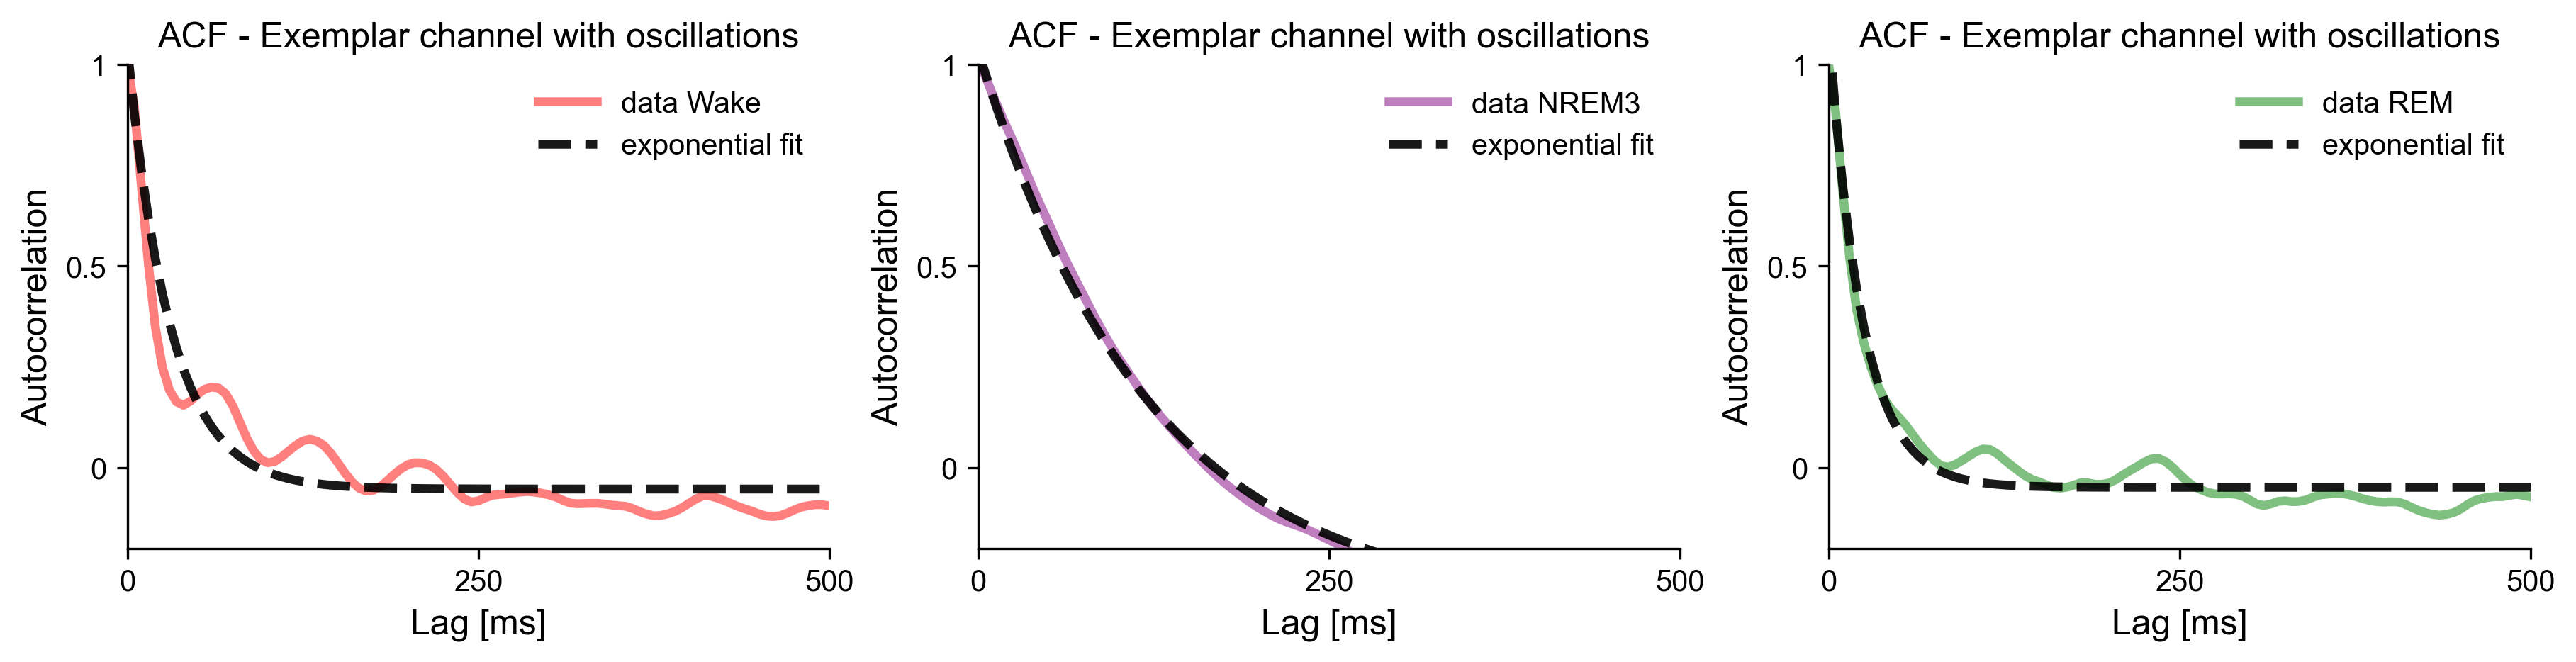

In [9]:
ch = inputs["chans"][1]
pat = inputs["pats"][1]

pat_dir = tau_path.joinpath("Pats", str(pat).zfill(3))
fig, axs = plt.subplots(1, 3, figsize=(12, 3), dpi=300, layout="constrained")

for i, stage in enumerate(["W", "N3", "R"]):
    # Load ACF
    file_name = str(pat).zfill(3) + "_" + stage.lower() + ".pkl"
    try:
        with open(pat_dir.joinpath(inputs["acf_dir"], file_name), "rb") as f:
            acf_pat_stage = pickle.load(f)
    except FileNotFoundError:
        continue
    idx_chan = acf_pat_stage["chans"].index(ch)

    # Load fit
    file_name = str(pat).zfill(3) + "_" + stage + "_tau.csv"
    df_fit = pd.read_csv(
        pat_dir.joinpath(inputs["acf_dir"], file_name),
        index_col=0,
    )
    params = literal_eval(
        df_fit.loc[ch, "params"]
        .replace("  ", " ")
        .replace("  ", " ")
        .replace("[ ", "[")
        .replace(" ", ",")
    )

    # Figure ACF
    axs[i].plot(
        acf_pat_stage["lags"] * 1000,
        acf_pat_stage["acf"][:, idx_chan].mean(axis=0),
        c=inputs["color_stages"][stage],
        label=f"data {inputs['title_dict'][stage]}",
        lw=3,
        alpha=0.5,
    )
    axs[i].plot(
        acf_pat_stage["lags"] * 1000,
        params[1] * (np.exp(-acf_pat_stage["lags"] / params[0]) + params[2]),
        c="k",
        ls="--",
        lw=3,
        alpha=0.9,
        label="exponential fit",
    )

    plots._format_spines(axs[i])  # , s_bounds={"left": (0, 1), "bottom": (0, 500)})
    axs[i].set_title(f"ACF - Exemplar channel with oscillations", fontsize=plots.fsize.TITLE_SIZE)
    axs[i].set_xlim(0, 500)
    axs[i].set_xticks([0, 250, 500], labels=[0, 250, 500], fontsize=plots.fsize.TICK_SIZE)
    axs[i].set_xlabel("Lag [ms]", fontsize=plots.fsize.LABEL_SIZE)
    axs[i].set_ylim(-0.2, 1)
    axs[i].set_yticks([0, 0.5, 1], labels=[0, 0.5, 1], fontsize=plots.fsize.TICK_SIZE)
    axs[i].set_ylabel("Autocorrelation", fontsize=plots.fsize.LABEL_SIZE)
    axs[i].legend(frameon=False, fontsize=plots.fsize.TEXT_SIZE)

plt.show()

Channel 2:

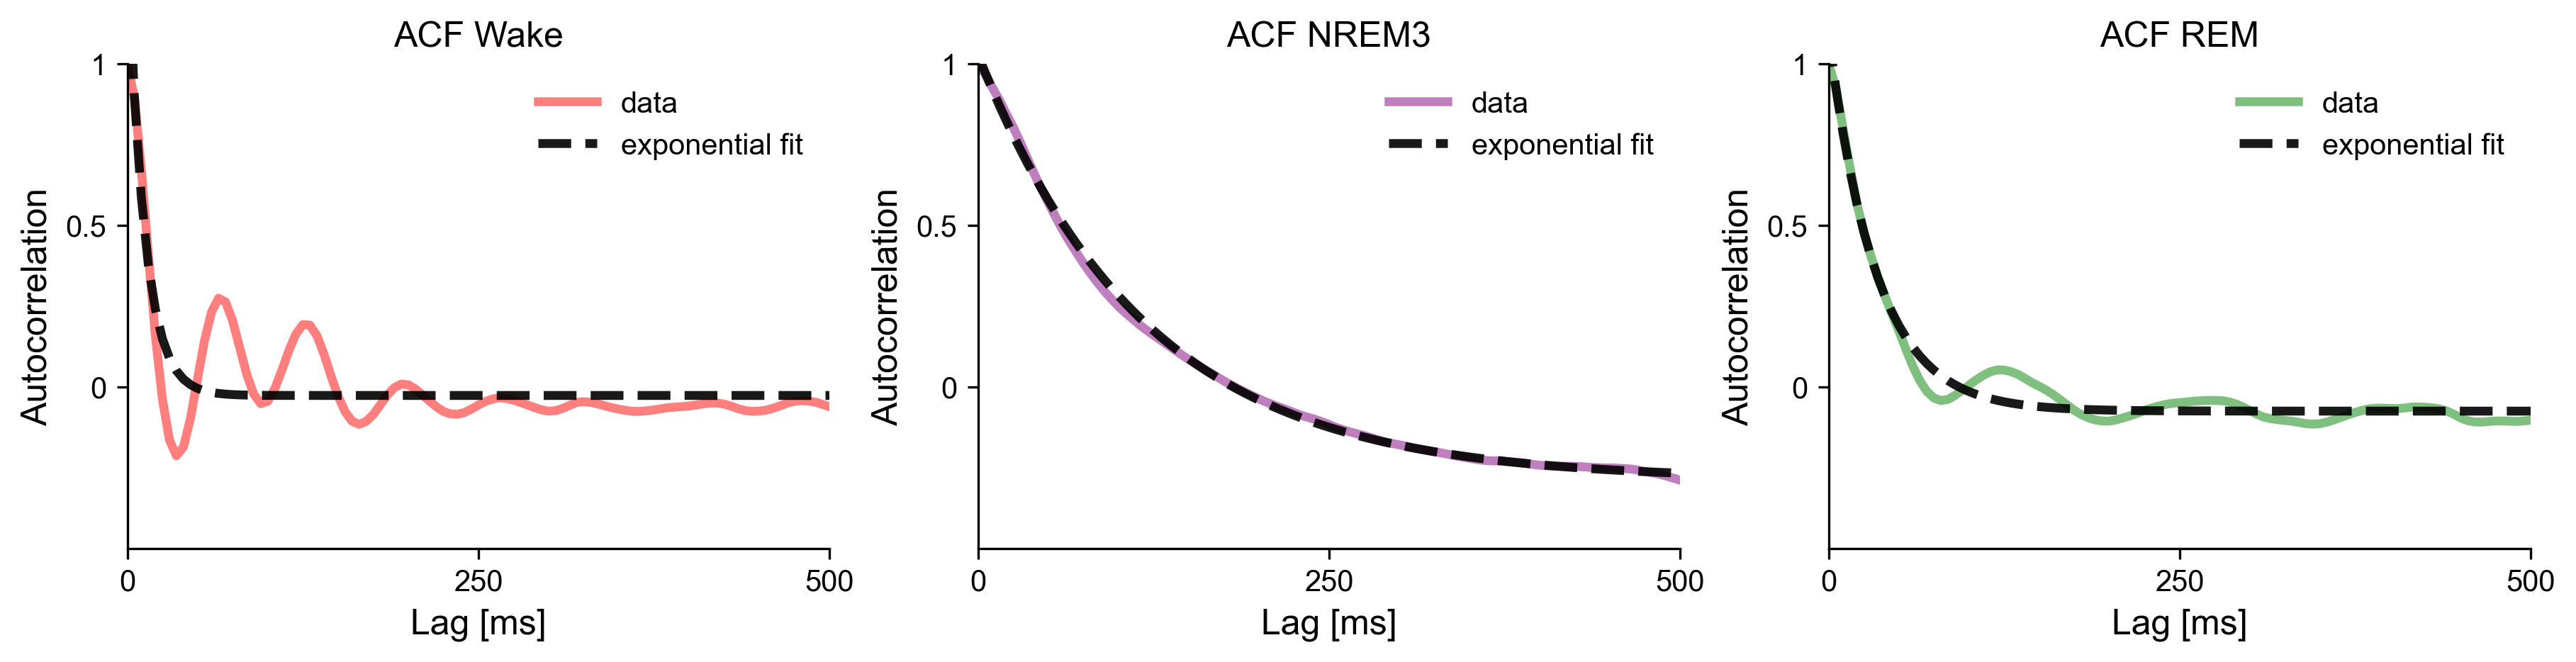

In [71]:
ch = inputs["chans"][2]
pat = inputs["pats"][2]

pat_dir = tau_path.joinpath("Pats", str(pat).zfill(3))
fig, axs = plt.subplots(1, 3, figsize=(12, 3), dpi=300, layout="constrained")

for i, stage in enumerate(["W", "N3", "R"]):
    # Load ACF
    file_name = str(pat).zfill(3) + "_" + stage.lower() + ".pkl"
    try:
        with open(pat_dir.joinpath(inputs["acf_dir"], file_name), "rb") as f:
            acf_pat_stage = pickle.load(f)
    except FileNotFoundError:
        continue
    idx_chan = acf_pat_stage["chans"].index(ch)

    # Load fit
    file_name = str(pat).zfill(3) + "_" + stage + "_tau.csv"
    df_fit = pd.read_csv(
        pat_dir.joinpath(inputs["acf_dir"], file_name),
        index_col=0,
    )
    params = literal_eval(
        df_fit.loc[ch, "params"]
        .replace("  ", " ")
        .replace("  ", " ")
        .replace("[ ", "[")
        .replace(" ", ",")
    )

    # Figure ACF
    axs[i].plot(
        acf_pat_stage["lags"] * 1000,
        acf_pat_stage["acf"][:, idx_chan].mean(axis=0),
        c=inputs["color_stages"][stage],
        label="data",
        lw=3,
        alpha=0.5,
    )
    axs[i].plot(
        acf_pat_stage["lags"] * 1000,
        params[1] * (np.exp(-acf_pat_stage["lags"] / params[0]) + params[2]),
        c="k",
        ls="--",
        lw=3,
        alpha=0.9,
        label="exponential fit",
    )

    plots._format_spines(axs[i])  # , s_bounds={"left": (0, 1), "bottom": (0, 500)})
    axs[i].set_title(f"ACF {inputs['title_dict'][stage]}", fontsize=plots.fsize.TITLE_SIZE)
    axs[i].set_xlim(0, 500)
    axs[i].set_xticks([0, 250, 500], labels=[0, 250, 500], fontsize=plots.fsize.TICK_SIZE)
    axs[i].set_xlabel("Lag [ms]", fontsize=plots.fsize.LABEL_SIZE)
    axs[i].set_ylim(-0.5, 1)
    axs[i].set_yticks([0, 0.5, 1], labels=[0, 0.5, 1], fontsize=plots.fsize.TICK_SIZE)
    axs[i].set_ylabel("Autocorrelation", fontsize=plots.fsize.LABEL_SIZE)
    axs[i].legend(frameon=False, fontsize=plots.fsize.TEXT_SIZE)

plt.show()

Channel 3:

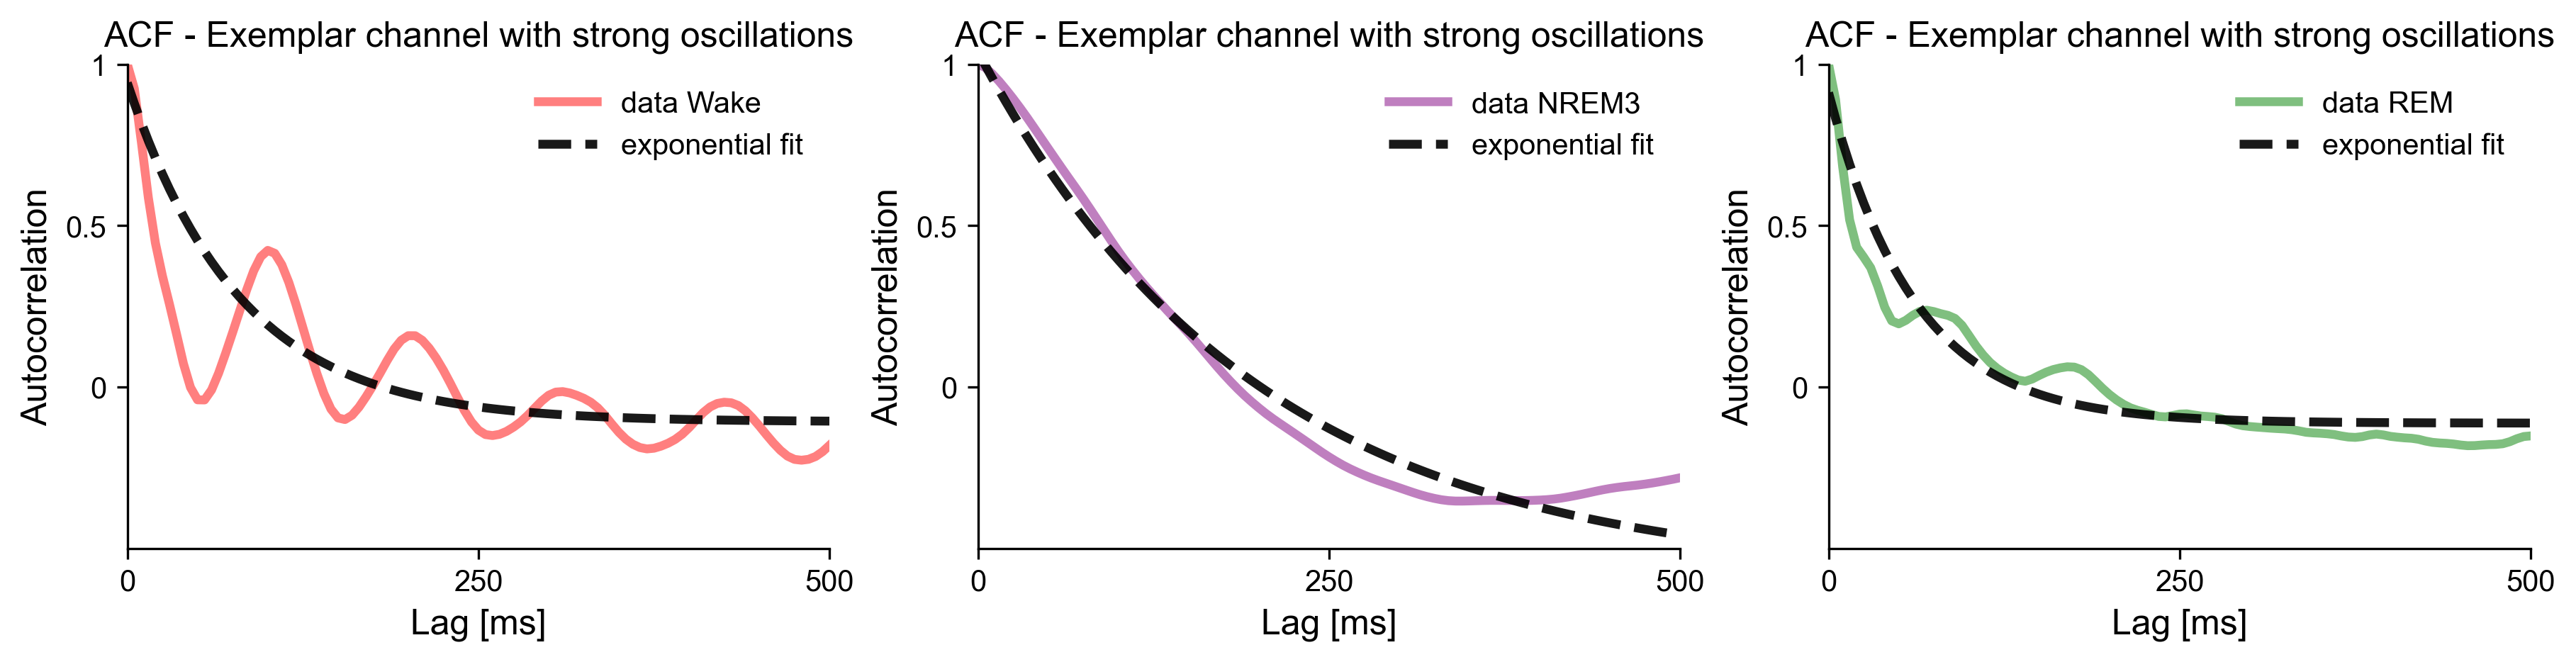

In [11]:
ch = inputs["chans"][3]
pat = inputs["pats"][3]

pat_dir = tau_path.joinpath("Pats", str(pat).zfill(3))
fig, axs = plt.subplots(1, 3, figsize=(12, 3), dpi=300, layout="constrained")

for i, stage in enumerate(["W", "N3", "R"]):
    # Load ACF
    file_name = str(pat).zfill(3) + "_" + stage.lower() + ".pkl"
    try:
        with open(pat_dir.joinpath(inputs["acf_dir"], file_name), "rb") as f:
            acf_pat_stage = pickle.load(f)
    except FileNotFoundError:
        continue
    idx_chan = acf_pat_stage["chans"].index(ch)

    # Load fit
    file_name = str(pat).zfill(3) + "_" + stage + "_tau.csv"
    df_fit = pd.read_csv(
        pat_dir.joinpath(inputs["acf_dir"], file_name),
        index_col=0,
    )
    params = literal_eval(
        df_fit.loc[ch, "params"]
        .replace("  ", " ")
        .replace("  ", " ")
        .replace("[ ", "[")
        .replace(" ", ",")
    )

    # Figure ACF
    axs[i].plot(
        acf_pat_stage["lags"] * 1000,
        acf_pat_stage["acf"][:, idx_chan].mean(axis=0),
        c=inputs["color_stages"][stage],
        label=f"data {inputs['title_dict'][stage]}",
        lw=3,
        alpha=0.5,
    )
    axs[i].plot(
        acf_pat_stage["lags"] * 1000,
        params[1] * (np.exp(-acf_pat_stage["lags"] / params[0]) + params[2]),
        c="k",
        ls="--",
        lw=3,
        alpha=0.9,
        label="exponential fit",
    )

    plots._format_spines(axs[i])  # , s_bounds={"left": (0, 1), "bottom": (0, 500)})
    axs[i].set_title(f"ACF - Exemplar channel with strong oscillations", fontsize=plots.fsize.TITLE_SIZE)
    axs[i].set_xlim(0, 500)
    axs[i].set_xticks([0, 250, 500], labels=[0, 250, 500], fontsize=plots.fsize.TICK_SIZE)
    axs[i].set_xlabel("Lag [ms]", fontsize=plots.fsize.LABEL_SIZE)
    axs[i].set_ylim(-0.5, 1)
    axs[i].set_yticks([0, 0.5, 1], labels=[0, 0.5, 1], fontsize=plots.fsize.TICK_SIZE)
    axs[i].set_ylabel("Autocorrelation", fontsize=plots.fsize.LABEL_SIZE)
    axs[i].legend(frameon=False, fontsize=plots.fsize.TEXT_SIZE)

plt.show()